# 3. Measuring a Bicycle Wheel's Inertia

This notebook introduces the relationship of vibrational motion to the inertia of a system and how one might estimate the inertia given measured vibrational data. The determination of the radial and axial moments of inertia of a bicycle wheel are used as a motivating example.

After the completion of this assignment students will be able to:

- import measurement data into Python
- visualize the vibrational measurements
- use interactive plots to cause a simulation to match measurements
- use curve fitting to estimate the period of oscillation
- understand the concept of natural frequency and its relationship to mass/inertia and stiffness
- state two of the three fundamental characteristics that govern vibration (mass/inertia and stiffness)
- discover the center of percussion of a compound pendulum

## Inertia and Vibration

One of the fundamental properties that affects how systems vibrate is the inertia of a system. Inertia is colloquially defined as the *tendency to do nothing or to remain unchanged*. A vibrating system is changing with respect to time, thus we may infer that inertia will try to prevent the system from changing. There are two specific types of inertia that we will address in this class: [mass](https://en.wikipedia.org/wiki/Mass) which is a resistance to linear motion and [moment of inertia](https://en.wikipedia.org/wiki/Moment_of_inertia) which is a resistenace to rotational motion. The moment of inertia is more specifically a descriptor for the distribution of mass in a system.

Most people are familiar with an ordinary bicycle wheel, so we will look into the inertial characteristics of bicycle wheels and how this relates to vibration. A bicycle wheel is mostly symetric about a plane that passes through the cross sectional center line of the circular rim in addition to being symmetric about any radial plane normal to the wheel plane. Recalling from dynamics, this means that the moment of inertia will have three [prinicipal moments of inertia](http://www.physics.arizona.edu/~varnes/Teaching/321Fall2004/Notes/Lecture34.pdf), two of which are equal due to the nature of the symmetry. The inertia about the axle of the wheel is the rotational inertia (resists the wheel rolling) and the inertia about any radial axis resists motions like turning the handlebars, etc. We demonstrated in the previous lesson that the inertia of the book affected the period of oscillation, and thus if a bicycle wheel is vibrated its inertia should affect the vibration in some way also.

# Torsional Pendulum

Vibrations of a mass or inertia occur when there is a force that acts on the system which displaces it from its equilibrium. A common way to measure inertia is to use a torsional spring with a known linear force/displacement ratio, the spring constant or stiffness, to resist motion and thus create this force. If we attach a torsional spring along a radial line of the bicycle wheel, through its center of mass and glue the other end to the ceiling it is possible to create a *torsional pendulum*. If you twist the wheel about the axis of the torsional spring it will start vibrating.

The video belows shows such a setup. A bicycle wheel is attached to the ceiling by a slender steel rod. The rod's axis passes through the center of mass of the wheel. When the bicycle wheel is given an initial angular displacement from the equilibrium and then released, it vibrates.

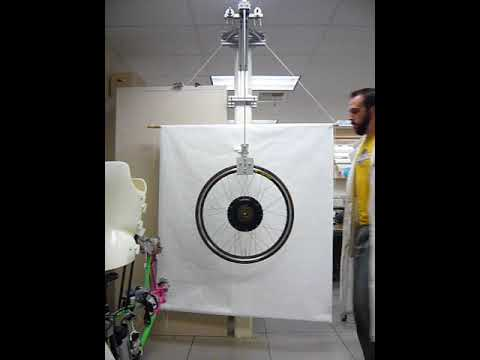

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('uuc1_RTYZLw', width=640, height=480)

A free body diagram can be sketched of this system:

<img src="fig/03/bicycle-wheel-radial-inertia-measurement-fbd.png" alt="image" width="400" />

**Exercise**

This system is slightly different than the book and cup system in the previous lesson. There are two fundamental properties of the system that make this it vibrate. What are these two things and how is it differen than the book on the cup?

*Write your answer here*

## Data

During the experiment shown in the above video I recorded some important constants about the system and measured the angular velocity of the system about the rod's axis with a [angular velocity gyro](https://en.wikipedia.org/wiki/Vibrating_structure_gyroscope) (which also functions internally based on vibrations). A gyro is a micro electromechanical device that outputs a voltage proportional to the angular velocity it experiences. The data is stored in a plain text comma separated value (CSV) file. The Unix `head` command can show the first set of lines and can be invoke in Jupyter using the prepended `!`.

In [2]:
!head data/03/bicycle-wheel-radial-inertia-rate-gyro-measurement.csv

time,angular_velocity
0.0,3.236790061330015
0.0020000000000000018,3.2304788385296246
0.003999999999999997,3.2195776355287498
0.005999999999999998,3.2092501800752573
0.008,3.1926115018876944
0.009999999999999995,3.1880215217073844
0.011999999999999997,3.1765465712743266
0.013999999999999999,3.1490066903384144
0.016,3.123188052093832


The data from the measurement can be loaded into a Panda's `DataFrame` with Panda's `read_csv()` function. The time index is in seconds and the angular velocity is in radians per second.

In [3]:
import pandas as pd

In [4]:
radial_gyro_meas = pd.read_csv('data/03/bicycle-wheel-radial-inertia-rate-gyro-measurement.csv', index_col='time')

This file has 1001 rows:

In [5]:
len(radial_gyro_meas)

1001

The `head()` and `tail()` functions associated with a `DataFrame` (identical to the Unix `head` and `tail`) can be used to inspect the beginning and end of the data:

In [6]:
radial_gyro_meas.head()

,angular_velocity
time,
0.000,3.236790
0.002,3.230479
0.004,3.219578
0.006,3.209250
0.008,3.192612


In [7]:
radial_gyro_meas.tail()

,angular_velocity
time,
1.992,-0.271675
1.994,-0.207989
1.996,-0.144303
1.998,-0.085207
2.000,-0.030127


This can then be plotted to see what the measurement looks like. I use the `'.'` style to show the individual measurements more clearly. You can zoom in to see the individual measurements. Also, remember to enable the plotting display with:

In [8]:
%matplotlib inline

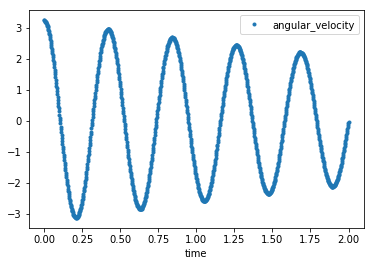

In [9]:
radial_gyro_meas.plot(style='.');

**Exercise**

Use your period estimation function from the previous lesson to try to get an estimate of the period of this oscillation.

In [10]:
from resonance.functions import estimate_period
estimate_period(radial_gyro_meas.index, radial_gyro_meas.angular_velocity)

0.42100000000000004

In [11]:
# write your answer here

# Simulating the system

There is a system in the `resonance` package that represents a basic torsional pendulum that can be used to simulate this system:

In [12]:
from resonance.linear_systems import TorsionalPendulumSystem

In [13]:
sys = TorsionalPendulumSystem()

Note that the constants are not yet set:

In [14]:
sys.constants

{'rotational_inertia': 0.0,
 'torsional_damping': 0.0,
 'torsional_stiffness': 0.0}

**Exercise**

Calculate the stiffness of the circular cross section rod based on your knowledge of torsional elastic mechanics. Here are some of the torsion rod's geometry and material properties:

-   Length of the torsion rod, $l$ : 1.05 m
-   Diameter of the torsion rod, $d$ : 6.35 mm
-   Modulus of Rigidity of steel, $G$ : 77 GPa

Set the system's `torsional_stiffness` to the value you calculate.

In [15]:
import numpy as np
l = 1.05  # m
d = 0.00635  # m
G = 77.0E9  # Pa
J = np.pi * d**4 / 32
sys.constants['torsional_stiffness'] = G * J / l
sys.constants

{'rotational_inertia': 0.0,
 'torsional_damping': 0.0,
 'torsional_stiffness': 11.705668520051944}

In [16]:
# write your answer here

**Exercise**

As a starting estimate of the inertia of the bicycle wheel, use the axial moment of inertia of an infinitely thin hoop of mass, $m$. See Wikipedia's [List of moments of inertia](https://en.wikipedia.org/wiki/List_of_moments_of_inertia) for the equation. The bicycle wheel used in the data collection had these values:

-   Outer radius of the bicycle wheel, $R$ : 0.336 m
-   Mass of the bicycle wheel, $m$ : 1.55 kg

Set the rotational inertia value in the system to the value you calculate.

In [17]:
mass = 1.55  # kg
radius = 0.336  # m
radial_inertia = mass * radius**2 / 4.0 # kg m**2
sys.constants['rotational_inertia'] = radial_inertia
sys.constants

{'rotational_inertia': 0.04374720000000001,
 'torsional_damping': 0.0,
 'torsional_stiffness': 11.705668520051944}

**Exercise**

Use the above constants and simulate the system with an initial angular velocity that matches the initial measured angular velocity in the measurements and store the result in a variable named `trajectory`. You can set the initial angular velocity by accessing the `System.speeds` dictionary and assigning a value. One way to select a single value from a Pandas `DataFrame` is to use the `DataFrame.loc[]` notation. This will allow you to select a row by it's index (a time value). Calculate the period of oscillation of this simulation and see if it is similar to the period you estimated from the data above. If the period is different, why might this be so?

In [18]:
sys.speeds['torsion_angle_vel'] = radial_gyro_meas.loc[0.0]['angular_velocity']

duration = radial_gyro_meas.index[-1] - radial_gyro_meas.index[0]

trajectory = sys.free_response(duration)

estimate_period(trajectory.index, trajectory.torsion_angle)

0.38250000000000012

## Interactive Plots

You should see that the computational system does not quite predict the actual period of the oscillation. One useful tool for interactively changing the constants of the system is a Jupyter "widget". Widgets let you create sliders, drop downs, value entry boxes, etc. to interactively change the results of the simulation. Below is an example of how you can create a widget that updates a plot interactively. In this case we'd like to adjust the inertia value until the period of oscillation of the simulation matches the period of the actual data.

The first step is to create a plot of the data, as we did above, but make sure to assign the axis that command creates to a variable `ax` so that we can add more information to the plot.

The second step is to define a function which has an input that you want to adjust interactively, in our case the radial inertia. This function should compute the new simulation trajectory, set the values for the simulation line with the new data, and finally redraw the figure.

In [19]:
import matplotlib.pyplot as plt

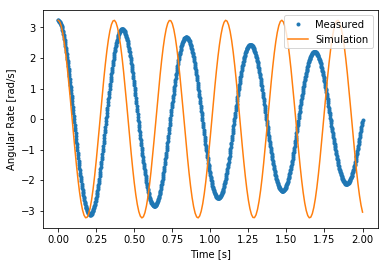

In [20]:
fig, ax = plt.subplots(1, 1)

# create initial plot
meas_lines = ax.plot(radial_gyro_meas.index, radial_gyro_meas.angular_velocity, '.')

# add a line to the plot
sim_lines = ax.plot(trajectory.index, trajectory.torsion_angle_vel)

ax.set_ylabel('Angular Rate [rad/s]')
ax.set_xlabel('Time [s]')
ax.legend(['Measured', 'Simulation'], loc=1)

# now create a function that has an input that you'd like to varying interactively
# the function should compute the updated trajectory with this new value and change the data on the line
def plot_trajectory_comparison(rotational_inertia=0.04):
    # set the new inertia value
    sys.constants['rotational_inertia'] = rotational_inertia
    # simulate the system with new value
    trajectory = sys.free_response(duration)
    # set the x and y data of the simulation line to new data
    sim_lines[0].set_data(trajectory.index, trajectory.torsion_angle_vel)
    # redraw the figure with the updated line
    fig.canvas.draw()

# call the function to make the initial plot
plot_trajectory_comparison()

Now the fun part. You can use the `interact` function from the `ipywidgets` package to make the plot interactive. You pass in the function that does the plot updating and then a range for the slider for the axial inertia as `(smallest_value, largest_value, step_size)`. This will create a slider that updates the plot as you change the value.

In [21]:
from ipywidgets import interact

In [22]:
widget = interact(plot_trajectory_comparison, rotational_inertia=(0.01, 0.2, 0.001));

Here is a way to get to the value that the widget is set too (it's a bit obtuse, but we'll show different methods later):

In [23]:
widget.widget.children

(FloatSlider(value=0.04, description='rotational_inertia', max=0.2, min=0.01, step=0.001),
 Output())

In [24]:
widget.widget.children[0].value

0.04

# How does inertia relate to the period?

By now it should be pretty clear that there is a relationship between the inertia of the system and the period of oscillation. It would be nice to plot the period versus the change in inertia to try and determine what the relationship is. Say we want to check a range of inertia values from X to Y, we can create those values with:

In [25]:
import numpy as np

In [26]:
inertias = np.linspace(0.001, 0.2, num=50)

## Python For Loops

Instead of typing the simulation code out for each of the 50 inertia values, we can use a loop to iterate through each value and save some typing. Python loops are constructed with the `for` command and, in the simplest case, the `in` command. Here is an example that iterates through the inertia values, computes what the hoop radius would be if the mass was fixed, and prints the value of the radius on each iteration:

In [27]:
for inertia in inertias:
    radius = np.sqrt(2 * inertia / mass)
    print(radius)

0.0359210604054
0.0808122035642
0.108493787422
0.130426958768
0.149169303939
0.165806425997
0.18092003915
0.194864953828
0.207876501545
0.220120261582
0.231717973457
0.242762247657
0.253325479476
0.263465535158
0.273229533324
0.282656447909
0.291778952649
0.300624760911
0.30921762003
0.317578063162
0.325723987243
0.333671103828
0.34143329538
0.349022900192
0.356450942659
0.3637273212
0.370860962965
0.377859952251
0.384731637872
0.391482723557
0.398119344554
0.40464713291
0.411071273427
0.417396551856
0.423627396618
0.429767915077
0.43582192521
0.441792983373
0.447684408733
0.453499304836
0.459240578728
0.464910957942
0.470513005643
0.476049134169
0.481521617176
0.486932600543
0.492284112212
0.497578071061
0.502816294948
0.508000508001


It is also often useful to store the computed values in a list or array as the loop iterates so you can use the values in future computations. Here is a way to store the values in a Python list and then convert the list to a NumPy array.

In [28]:
radii = []  # create an empty list
for inertia in inertias:
    radius = np.sqrt(2 * inertia / mass)
    radii.append(radius)  # add the radius to the end of the list
radii = np.array(radii)  # convert the list to a NumPy array
radii

array([ 0.03592106,  0.0808122 ,  0.10849379,  0.13042696,  0.1491693 ,
        0.16580643,  0.18092004,  0.19486495,  0.2078765 ,  0.22012026,
        0.23171797,  0.24276225,  0.25332548,  0.26346554,  0.27322953,
        0.28265645,  0.29177895,  0.30062476,  0.30921762,  0.31757806,
        0.32572399,  0.3336711 ,  0.3414333 ,  0.3490229 ,  0.35645094,
        0.36372732,  0.37086096,  0.37785995,  0.38473164,  0.39148272,
        0.39811934,  0.40464713,  0.41107127,  0.41739655,  0.4236274 ,
        0.42976792,  0.43582193,  0.44179298,  0.44768441,  0.4534993 ,
        0.45924058,  0.46491096,  0.47051301,  0.47604913,  0.48152162,
        0.4869326 ,  0.49228411,  0.49757807,  0.50281629,  0.50800051])

If you want to work with the NumPy array up front you can create an empty NumPy array and then fill it by using the correct index value. This index value can be exposed using the `enumerate()` function. For example:

In [29]:
radii = np.zeros_like(inertias)
radii

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [30]:
for i, inertia in enumerate(inertias):
    radius = np.sqrt(2 * inertia / mass)
    radii[i] = radius
radii

array([ 0.03592106,  0.0808122 ,  0.10849379,  0.13042696,  0.1491693 ,
        0.16580643,  0.18092004,  0.19486495,  0.2078765 ,  0.22012026,
        0.23171797,  0.24276225,  0.25332548,  0.26346554,  0.27322953,
        0.28265645,  0.29177895,  0.30062476,  0.30921762,  0.31757806,
        0.32572399,  0.3336711 ,  0.3414333 ,  0.3490229 ,  0.35645094,
        0.36372732,  0.37086096,  0.37785995,  0.38473164,  0.39148272,
        0.39811934,  0.40464713,  0.41107127,  0.41739655,  0.4236274 ,
        0.42976792,  0.43582193,  0.44179298,  0.44768441,  0.4534993 ,
        0.45924058,  0.46491096,  0.47051301,  0.47604913,  0.48152162,
        0.4869326 ,  0.49228411,  0.49757807,  0.50281629,  0.50800051])

It is also worth noting that NumPy provides *vectorized* functions and that loops are not needed for the above example, for example:

In [31]:
radii = np.sqrt(2 * inertias / mass)
radii

array([ 0.03592106,  0.0808122 ,  0.10849379,  0.13042696,  0.1491693 ,
        0.16580643,  0.18092004,  0.19486495,  0.2078765 ,  0.22012026,
        0.23171797,  0.24276225,  0.25332548,  0.26346554,  0.27322953,
        0.28265645,  0.29177895,  0.30062476,  0.30921762,  0.31757806,
        0.32572399,  0.3336711 ,  0.3414333 ,  0.3490229 ,  0.35645094,
        0.36372732,  0.37086096,  0.37785995,  0.38473164,  0.39148272,
        0.39811934,  0.40464713,  0.41107127,  0.41739655,  0.4236274 ,
        0.42976792,  0.43582193,  0.44179298,  0.44768441,  0.4534993 ,
        0.45924058,  0.46491096,  0.47051301,  0.47604913,  0.48152162,
        0.4869326 ,  0.49228411,  0.49757807,  0.50281629,  0.50800051])

It is a good idea to use vectorized functions instead of loops when working with arrays if you can, because they are much faster:

In [32]:
%%timeit -n 1000

radii = []
for inertia in inertias:
    radius = np.sqrt(2 * inertia / mass)
    radii.append(radius)
radii = np.array(radii)

197 µs ± 909 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%%timeit  -n 1000

np.sqrt(2.0 * inertias / mass)

4.5 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Exercise**

Use a loop to construct a list of periods for different inertia values. After you have both arrays, plot the inertias on the $X$ axis and the frequencies on the $Y$ axis. Is there any functional relationship that describes the relationship between the variables?

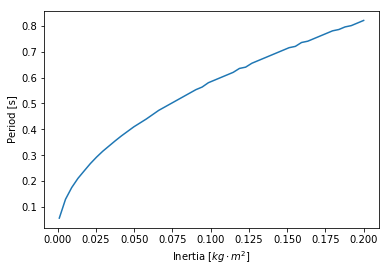

In [34]:
periods = []
for inertia in inertias:
    sys.constants['rotational_inertia'] = inertia
    trajectory = sys.free_response(duration)
    periods.append(estimate_period(trajectory.index, trajectory.torsion_angle))

fig, ax = plt.subplots(1, 1)
ax.plot(inertias, periods)
ax.set_xlabel('Inertia [$kg \cdot m^2$]')
ax.set_ylabel('Period [s]');

Trying plotting the inertia versus the square root of the inertia to see if there are any similarities.

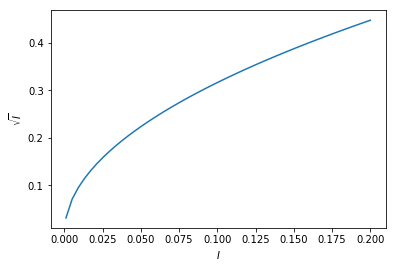

In [35]:
plt.figure()
plt.plot(inertias, np.sqrt(inertias))
plt.xlabel('$I$')
plt.ylabel('$\sqrt{I}$');

It turns out that the period of oscillation, $T$, is proportional to the square root of the oscillating inertia.

$$ T \propto \sqrt{I} $$

and more precisely the proportionality coefficient ends up being:

$$ \frac{2\pi}{\sqrt{k}} $$

we will discuss why this is the case when we get to modeling in later notebooks.

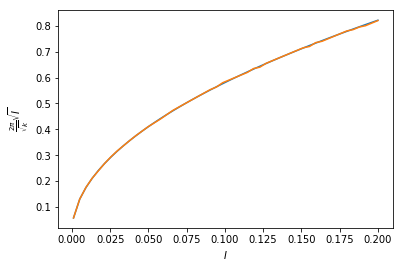

In [36]:
plt.figure()
x = np.linspace(0, 0.2, 100)
plt.plot(inertias, 2 * np.pi / np.sqrt(sys.constants['torsional_stiffness']) * np.sqrt(inertias))
plt.plot(inertias, periods)
plt.xlabel('$I$')
plt.ylabel(r'$\frac{2 \pi}{\sqrt{k}} \sqrt{I}$');

# Frequency and Period

We've been talking about the period of oscillation so far, which is defined as the time between a repeating configuration, i.e. seconds per cycle of oscillation. The inverse of period is frequency: the number of cycles per second. The unit [Hertz](https://en.wikipedia.org/wiki/Hertz) is a special unit for cycles per second.

**Exercise**

Given a period of 1.35 seconds, (1) what is the frequency in Hertz? and (2) what is the is frequency in radians per second? (3) create two functions, one that coverts period to frequency in radians per second called `period2freq` and one that does the opposite called `freq2period`.

In [37]:
T = 1.35  # s
f = 1.0 / 1.35  # H
print('Frequency: {} H'.format(f))

omega = 2 * np.pi * f  # rad/s
print('Frequency: {} rad/s'.format(omega))

def period2freq(period):
    return 1.0 / period * 2.0 * np.pi

def freq2period(freq):
    return 1.0 / freq * 2.0 * np.pi

print('Period from frequency: {}'.format(period2freq(1.0)))

print('Frequency from period: {}'.format(freq2period(6.283185)))

Frequency: 0.7407407407407407 H
Frequency: 4.654211338651545 rad/s
Period from frequency: 6.283185307179586
Frequency from period: 1.000000048889152


The fundamental frequency of osciallation of the generalized coordinate of a single degree of freedom system is called the [*natural frequency*](https://en.wikipedia.org/wiki/Natural_frequency). The natural frequency is named because it is the frequency a system tends to oscillate at when no driving forces are applied.

# Curve Fitting

Above, we interactively adjusted the inertia such that the simulation's period matched the measured data. Another way to determine the period of oscillation more accurately is to try and find the best fitting curve through the data points. The Python package `scipy` provides a very conveinent function called [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). This function implements a [least squares method](https://en.wikipedia.org/wiki/Least_squares) that finds an optimal fit based on parameterized function provided by the user. Let's see how it works.

In [38]:
from scipy.optimize import curve_fit

First define a Python function where the first input argument are the "x" values (an array) and the remaining arguments are the parameters that can be adjusted to find the optimal fit. In this case, a simple cosine function with an adjustable amplitude and frequency is created.

In [39]:
def cos_func(times, amplitude, frequency):
    return amplitude * np.cos(frequency * times)

To check that it works, provide some values:

In [40]:
cos_func(np.linspace(0, 10), 5.0, 5.0)

array([ 5.        ,  2.61509054, -2.26452058, -4.98386109, -2.94877861,
        1.89933186,  4.93554853,  3.26343065, -1.52188188, -4.85537421,
       -3.55701539,  1.13460728,  4.7438557 ,  3.82763759, -0.74000816,
       -4.60171293, -4.07355022,  0.34063186,  4.42986349,  4.29316578,
        0.06094341, -4.22941677, -4.48506653, -0.46212525,  4.00166678,
        4.64801363,  0.86032381, -3.74808376, -4.78095517, -1.2529685 ,
        3.47030474,  4.88303294,  1.63752457, -3.17012294, -4.95358797,
       -2.01150948,  2.8494762 ,  4.99216479,  2.37250897, -2.51043448,
       -4.99851436, -2.71819257,  2.15518649,  4.97259569,  3.04632869,
       -1.78602555, -4.9145761 , -3.35479905,  1.4053348 ,  4.82483014])

Now, provide this function to `curve_fit` along with the measure data (x and y) and an initial guess for the amplitude and frequency. A good initial guess is important, as the optimal solution can't always be found from an arbitrary initial guess. The function `curve_fit` returns two items. The first is the optimal values of the two parametes and the second is the covariance matrix that gives an idea of how certain the value of the parameters are. We will just work with the first value for now.

In [41]:
popt, pcov = curve_fit(cos_func,  # our function
                       radial_gyro_meas.index,  # measured x values
                       radial_gyro_meas.angular_velocity,  # measured y values
                       p0=(3.0, period2freq(0.44)))  # the initial guess for the two parameters

Now we see the optimal values for the amplitude and frequency:

In [42]:
popt

array([  2.6234929 ,  14.92324255])

It is useful to plot the optimal function versus the measured data:

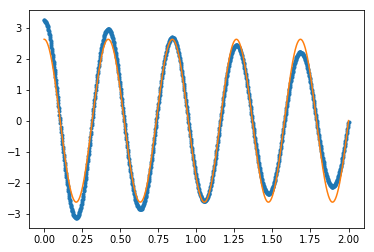

In [43]:
fig, ax = plt.subplots(1, 1)
ax.plot(radial_gyro_meas.index, radial_gyro_meas.angular_velocity, '.')
ax.plot(radial_gyro_meas.index, cos_func(radial_gyro_meas.index, popt[0], popt[1]));

That looks like a pretty nice fit! The period of this fitted function can now be computed:

In [44]:
freq2period(popt[1])

0.42103351768573721

**Exercise**

This system, just like the book on a cup system has an amplitude that decreases with respect to time. This decrease is often referred to as a *decaying amplitude*. We just fit the mathematical function:

$$ \dot{\theta}(t) = A \cos{\omega t} $$

where $A$ is the amplitude of the angular rate $\dot{\theta}$ and $\omega$ is the frequency of oscillation in radians per second. One way to account for the decay in amplitude oscillation is to introduce a multiplicative factor of $e^{-\lambda t}$ into the equation. This will cause exponential decay at the rate $\lambda$ (units are 1 / s). The mathematical equation will look like:

$$ \dot{\theta}(t) = A e^{-\lambda t} \cos{\omega t} $$

Recall that $e^{-\lambda t}$ looks like:

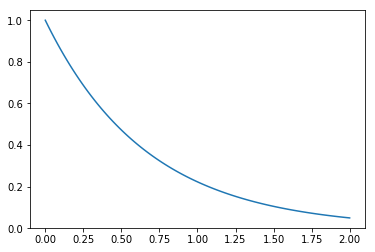

In [45]:
plt.figure()
t = np.linspace(0, 2, num=100)
plt.plot(t, np.exp(-1.5 * t));

Use decaying oscillation mathematical function to create a curve fitting function and find the values of $A$, $\lambda$, and $\omega$ that best fit the data. Calculate the period of oscillation and compare it to the period from the purely sinusoidal fit from above. Is there any difference in the period of oscillation?

0.4211942223551739

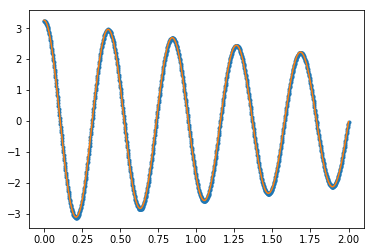

In [46]:
def decaying_sinusoid(t, a, lam, w):
    return a * np.exp(lam * t) * np.cos(w * t)

popt, pcov = curve_fit(decaying_sinusoid,
                       radial_gyro_meas.index,
                       radial_gyro_meas.angular_velocity,
                       p0=(3.0, -0.0002, period2freq(0.44)))

fig, ax = plt.subplots(1, 1)
ax.plot(radial_gyro_meas.index, radial_gyro_meas, '.')
ax.plot(radial_gyro_meas.index, decaying_sinusoid(radial_gyro_meas.index, popt[0], popt[1], popt[2]));

freq2period(popt[2])

In [47]:
# write solution here

The natural frequency of a decayed oscillation is slightly different than that of a non-decaying oscillation.

This function does an excellent job at fitting the measurements!

**Exercise**

The system also has a constant called `viscous_damping`. This is constant represents the proportion of a force that is linearly related to the angular velocity of the oscillation of the wheel. The faster it rotates the more force is applied to slow it down. This will cause more damping in the simulation the higher the value is. It is a resonable representation of the damping from air resistance on the wheel. Make an interactive plot like you did above with two adjustable constants: `viscous_damping` and `radial_inertia`. Adjust the parameters until the simulation matches. Does the simulation match the best fit from above?

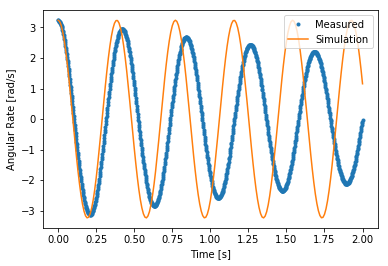

In [48]:
ax = radial_gyro_meas.plot(style='.')
line = ax.plot(trajectory.index, trajectory.torsion_angle_vel)
ax.set_ylabel('Angular Rate [rad/s]')
ax.set_xlabel('Time [s]')
ax.legend(['Measured', 'Simulation'], loc=1)

def plot_trajectory_comparison(rotational_inertia=0.044, torsional_damping=0.0):
   sys.constants['rotational_inertia'] = rotational_inertia  # set the new inertia value
   sys.constants['torsional_damping'] = torsional_damping
   traj = sys.free_response(duration)  # simulate the system with new value
   line[0].set_data(traj.index, traj.torsion_angle_vel)  # set the x and y data of the simulation line to new data
   plt.gcf().canvas.draw()  # redraw the figure with the updated line

# call the function to make the initial plot
plot_trajectory_comparison()

In [49]:
# write solutin here

In [50]:
widget = interact(plot_trajectory_comparison,
                  rotational_inertia=(0.01, 0.2, 0.001),
                  torsional_damping=(0.0, 0.05, 0.001));

In [51]:
widget.widget.children[0].value

0.044

In [52]:
widget.widget.children[1].value

0.0

# Compound Pendulum

At this point we have figured out the moment of inertia about any radial axis that passes through the center of the wheel. We would also like to find the moment of inertia about the wheel's axle, the *spin moment of inertia*. This moment of interia affects how fast the bicycle wheel can be acelerated and decelerated. We could potentally hang the bicycle wheel on the torsion rod such that the axle's axis aligns with the torsion bar's axis. But there is a simpler way that only requires a fulcrum point and gravity to act as our (constant force) "spring". The video below shows a children's bicycle wheel hanging by the inner diameter of the rim on a small circular rod and a angular velocity gyro is attached to the wheel with it's measurement axis align with the wheel's axle. This arrangement is called a [*compound pendulum*](https://en.wikipedia.org/wiki/Pendulum#Compound_pendulum). A compound pendulum is any single degree of freedom pendulum in whch the swinging portion can be considered a [*rigid body*](https://en.wikipedia.org/wiki/Rigid_body).

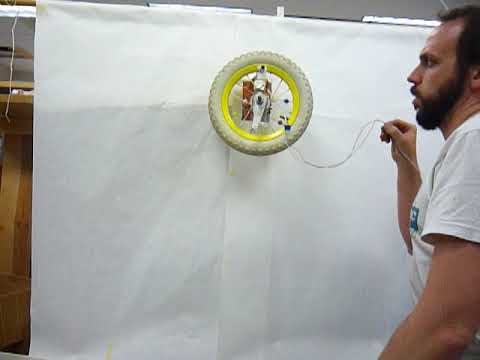

In [53]:
YouTubeVideo('D2tSoGqhtx0', width=640, height=480)

The figure below shows a free body diagram of a compound pendulum. In our case the wheel is the rigid body and the revolute joint is the fulcrum.

<img src="fig/03/bicycle-wheel-axial-inertia-measurement-fbd.png" \>

The data from the measurement of the same full sized bicycle wheel from the previous analysis can be loaded with:

In [54]:
axial_gyro_meas = pd.read_csv('data/03/bicycle-wheel-axial-inertia-rate-gyro-measurement.csv',
                              index_col='time')

In [55]:
axial_gyro_meas.head()

,angular_velocity
time,
0.000,0.641871
0.002,0.632117
0.004,0.616626
0.006,0.618921
0.008,0.613757


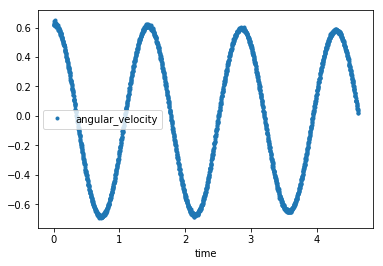

In [56]:
axial_gyro_meas.plot(style='.');

Note that this measurement has much less damping than the torsional pendulum. Once again our goal is to determine what the moment of the inertia of the bicycle wheel is. We can use a `CompoundPendulumSystem` to simulate this motion:

In [57]:
from resonance.linear_systems import CompoundPendulumSystem

In [58]:
cpend_sys = CompoundPendulumSystem()

The mass and radius of the wheel is the same as above. You can estimate the rotational moment of inertia about the axle as:

$$ I = m r^2 $$

But the inertia about the joint has to be computed using the parallel axis theorem.

**Exercise**

Using the parallel axis thereom, compute an estimate of the inertia about the joint if the distance from the axle to the joint is 0.296 meters. Store both results in variables named `inertia_about_axle` and `inertia_about_joint`.

https://en.wikipedia.org/wiki/Parallel_axis_theorem

In [59]:
mass = 1.55  # kg
radius = 0.336  # m
inertia_about_axle = mass * radius**2
print(inertia_about_axle)

inertia_about_joint = inertia_about_axle + mass * 0.296**2
print(inertia_about_joint)

0.17498880000000003
0.3107936


In [60]:
# write your solution here

Now simulate the pendulum with an initial angular velocity that is the same as measurement and see how well they match.

In [61]:
cpend_sys.constants

{'acc_due_to_gravity': 0.0,
 'inertia_about_joint': 0.0,
 'joint_to_mass_center': 0.0,
 'pendulum_mass': 0.0}

In [62]:
cpend_sys.constants['acc_due_to_gravity'] = 9.81  # m/**2
cpend_sys.constants['inertia_about_joint'] = inertia_about_joint  # kg m**2
cpend_sys.constants['joint_to_mass_center'] = 0.296  # m
cpend_sys.constants['pendulum_mass'] = mass  # kg

In [63]:
cpend_sys.speeds['angle_vel'] = axial_gyro_meas.loc[0.0]['angular_velocity']

In [64]:
trajectory = cpend_sys.free_response(5)

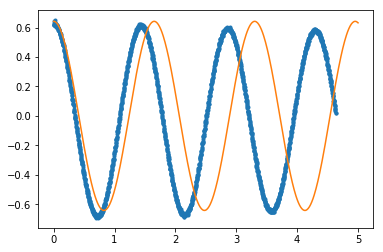

In [65]:
fig, ax = plt.subplots(1, 1)
ax.plot(axial_gyro_meas.index, axial_gyro_meas, '.')
line = ax.plot(trajectory.index, trajectory['angle_vel'])

def plot(inertia=0.5):
    cpend_sys.constants['inertia_about_joint'] = inertia
    traj = cpend_sys.free_response(5)
    line[0].set_data(traj.index, traj['angle_vel'])

In [66]:
interact(plot, inertia=(0.0, 1.0, 0.001));

**Exercise**

Use your `decaying_sinusoid` function to find a best fit for this data.

1.430838358947675

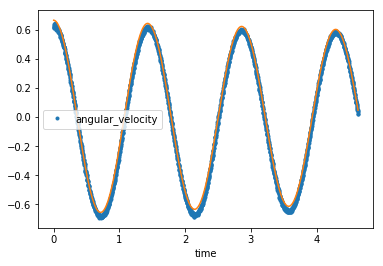

In [67]:
popt, pcov = curve_fit(decaying_sinusoid,
                       axial_gyro_meas.index,
                       axial_gyro_meas.angular_velocity,
                       p0=(0.6, -0.0002, 1.0 / 0.44 * np.pi * 2))

ax = axial_gyro_meas.plot(style='.')
ax.plot(axial_gyro_meas.index, decaying_sinusoid(axial_gyro_meas.index, *popt));

freq2period(popt[2])

In [68]:
# write you answer here

**Exercise**

Finally, using the period of oscillation, $T$, from the data above, you can compute the inertia about the joint using the `CompoundPendulumSystem` or this relationship:

$$ I_o = T^2 \frac{mgl}{4\pi^2} $$

Store the result of this calculation in a variable called `actual_inertia_about_the_joint`.

In [69]:
# write your solution here

In [70]:
actual_inertia_about_joint = freq2period(popt[2])**2 / 4/ np.pi**2 * mass * 9.81 * 0.296
actual_inertia_about_joint

0.23340697435979041

**Exercise**

Use the parallel axis thereom to find the moment of inertia about the axle (the location of the center of mass) and store it in a variable called `acutal_inertia_about_axle`.

In [71]:
actual_inertia_about_axle = actual_inertia_about_joint - mass * 0.296**2
actual_inertia_about_axle

0.097602174359790433

In [72]:
# write your answer here

# Center of Percussion

The [center of percussion](https://en.wikipedia.org/wiki/Center_of_percussion) of a compound pendulum is described as the location on the pendulum that corrsponds to the length of a simple pendulum of the same mass which has the same frequency of oscillation. The following video demonstrates the principle:

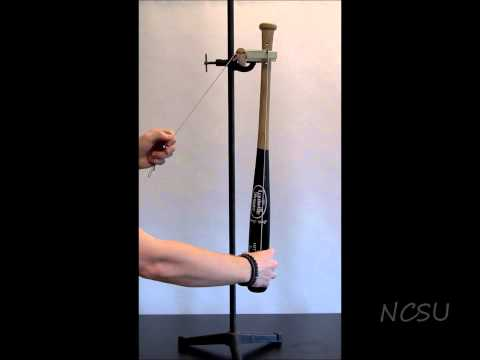

In [73]:
YouTubeVideo('Dw3UpKQVhVY', width=640, height=480)

 Using a `SimplePendulumSystem` we can simulate it alongside the compound pendulum to determine the center of percussion.

In [74]:
from resonance.linear_systems import SimplePendulumSystem
spend_sys = SimplePendulumSystem()

In [75]:
spend_sys.constants

{'acc_due_to_gravity': 0.0, 'pendulum_length': 0.0, 'pendulum_mass': 0.0}

In [76]:
spend_sys.constants['acc_due_to_gravity'] = 9.81
spend_sys.constants['pendulum_mass'] = 1.55
spend_sys.constants['pendulum_length'] = 0.3
spend_sys.speeds['angle_vel'] = axial_gyro_meas.loc[0.0]['angular_velocity']

In [77]:
spend_traj = spend_sys.free_response(5)

In [78]:
cpend_sys.constants['inertia_about_joint'] = actual_inertia_about_joint
cpend_traj = cpend_sys.free_response(5)

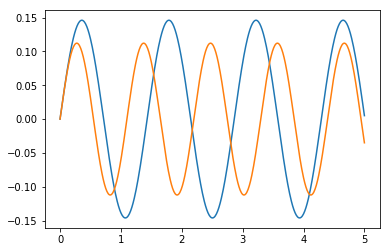

In [79]:
fig, ax = plt.subplots(1, 1)
ax.plot(cpend_traj.index, cpend_traj.angle)
line = ax.plot(spend_traj.index, spend_traj.angle)
def plot(pend_length=0.3):
    spend_sys.constants['pendulum_length'] = pend_length
    spend_traj = spend_sys.free_response(5)
    line[0].set_data(spend_traj.index, spend_traj.angle)
plot()

In [80]:
interact(plot, pend_length=(0, 1.0, 0.01));

# More on center of percussion

The baseball bat: https://physics.csuchico.edu/baseball/DrBaseball/SweetSpot/